# Import Libraries

### The necessary libraries for data manipulation, visualization, and calculation are imported.

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv('wdbc.data', header=None, names=columns)

# Show the first 5 rows
print(data.head(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   
5    843786         M      12.45      15.70      82.57      477.1    0.12780   
6    844359         M      18.25      19.98     119.60     1040.0    0.09463   
7  84458202         M      13.71      20.83      90.20      577.9    0.11890   
8    844981         M      13.00      21.82      87.50      519.8    0.12730   
9  84501001         M      12.46      24.04      83.97      475.9    0.11860   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760    0.30010    0.14710  ... 

## Inspecting the data

### data.taile() Shows the last few rows to see how the data ends

In [25]:
print(data.tail(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
559  925291         B      11.51      23.93      74.52      403.5    0.09261   
560  925292         B      14.05      27.15      91.38      600.4    0.09929   
561  925311         B      11.20      29.37      70.67      386.0    0.07449   
562  925622         M      15.22      30.62     103.40      716.9    0.10480   
563  926125         M      20.92      25.09     143.00     1347.0    0.10990   
564  926424         M      21.56      22.39     142.00     1479.0    0.11100   
565  926682         M      20.13      28.25     131.20     1261.0    0.09780   
566  926954         M      16.60      28.08     108.30      858.1    0.08455   
567  927241         M      20.60      29.33     140.10     1265.0    0.11780   
568   92751         B       7.76      24.54      47.92      181.0    0.05263   

     Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
559    0.10210    0.11120    0.04105  

### Shape of the Dataset: Provides the number of rows and columns, giving an idea of the dataset size

In [26]:
data.shape

(569, 32)

### Information of the Dataset: Shows details about the data types and the presence of null values

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

### Statistical Summary: Gives statistical insights such as mean, standard deviation, min, and max for numerical columns.

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Outlier Detection: Using IQR (Interquartile Range)

#### Imports: The code brings in tools for making graphs (matplotlib and seaborn).

### Outlier Function:
#### The calculate_outliers function checks each column in a table (DataFrame) for outliers.
#### It finds the low and high limits for normal values using the first and third quartiles (Q1 and Q3).
#### It counts how many values are outside these limits.

### Prepare Data:
#### The code removes the 'Diagnosis' column from the dataset, focusing only on the features for outlier analysis.

### Count Outliers:
#### It uses the function to count how many outliers are in each feature.

### Make a Bar Graph:
#### The code creates a bar graph showing the number of outliers for each feature, making it easy to see which features have more outliers.

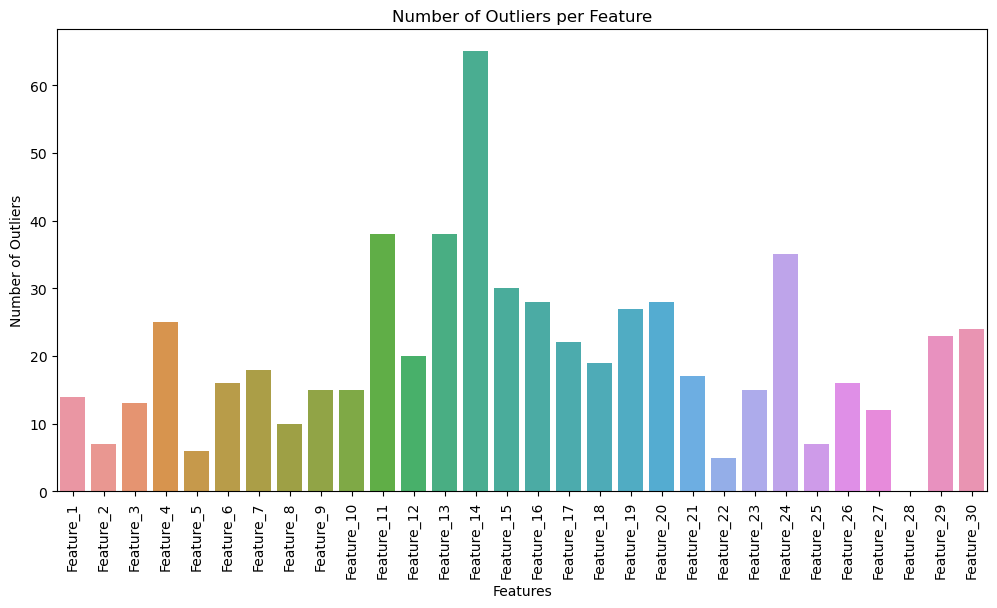

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return pd.Series(outliers)


X = data.drop('Diagnosis', axis=1)
num_outliers_per_column = calculate_outliers(X)

plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values)
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.xlabel("Features")
plt.ylabel("Number of Outliers")
plt.show()

## Check for Misssing Values

#### Missing Values: Identifies any missing values across the dataset
#### value 0 means there are no missing values

In [30]:

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


## Checki for Duplicates
#### Duplicate Check: Detects and counts duplicate rows and calculates their percentage

In [31]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


## Checking for unique values
#### Unique Values: Displays the number of unique values in each column, useful for identifying categorical data.


In [32]:
print("\nUnique Values in Each Column:")
print(data.nunique())


Unique Values in Each Column:
ID            569
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


## Dropin 'ID' Cloumn since we dont need that for scaling

In [33]:
data.drop('ID', axis=1, inplace=True)

## Scalling features

#### Initialize the Scaler:scaler = StandardScaler() creates an object that will help standardize (scale) the data.

#### Scale the Features:X_scaled = scaler.fit_transform(X) standardizes the features in X. This means it adjusts the values so that they have a mean of 0 and a standard deviation of 1, making the data easier to work with for modeling


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying VIF to Reduce Features

#### If dataset with features like Age, Salary, and Experience, this function will 

#### calculate how much each feature is explained by the others. If Age and Salary are

#### highly correlated, their VIFs will be high, indicating multicollinearity.

#### features with a VIF higher than a certain threshold (e.g., 10) are usually removed 

#### to reduce multicollinearity and improve the stability of the model

In [37]:
# Calculate VIF and remove features with high multicollinearity
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

## Remove features with VIF > 10
#### This code iteratively calculates the VIF for each feature in the dataset. If any

#### feature has a VIF greater than 10, it’s dropped, and the process repeats. The goal

#### is to remove features causing multicollinearity to improve model stability.

In [38]:
# Iteratively remove features with VIF > 10
X_vif = pd.DataFrame(X_scaled, columns=X.columns)
while True:
    vif = calculate_vif(X_vif)
    if vif['VIF'].max() > 10:
        drop_feature = vif.loc[vif['VIF'].idxmax(), 'Feature']
        X_vif.drop(columns=[drop_feature], inplace=True)
        print(f"Dropped feature: {drop_feature} due to high VIF")
    else:
        break

Dropped feature: Feature_1 due to high VIF
Dropped feature: Feature_21 due to high VIF
Dropped feature: Feature_3 due to high VIF
Dropped feature: Feature_23 due to high VIF
Dropped feature: Feature_7 due to high VIF
Dropped feature: Feature_11 due to high VIF
Dropped feature: Feature_26 due to high VIF
Dropped feature: Feature_28 due to high VIF
Dropped feature: Feature_4 due to high VIF
Dropped feature: Feature_6 due to high VIF
Dropped feature: Feature_22 due to high VIF
Dropped feature: Feature_14 due to high VIF
Dropped feature: Feature_27 due to high VIF


## Update X with reduced features

In [39]:
X = X_vif.values

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Removing Outliers

In [41]:
# Remove outliers
def remove_outliers_with_target(X, y):
    mask = pd.Series([True] * len(X))
    for column in X.columns:
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask &= (X[column] >= lower_bound) & (X[column] <= upper_bound)
    return X[mask], y[mask]

## Applying outlier removal after VIF adjustment

In [43]:
y = data['Diagnosis']
X, y = remove_outliers_with_target(X_vif, y)

#### We use reset_index(drop=True, inplace=True) to reset the row indices of both the

#### feature set X and the target variable y. This ensures that the indices are

#### consecutive after any changes (like dropping rows or columns), avoiding any 

#### mismatched or missing index values.

In [44]:
# Reset indices
X = pd.DataFrame(X)
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Visualize class distribution before SMOTE

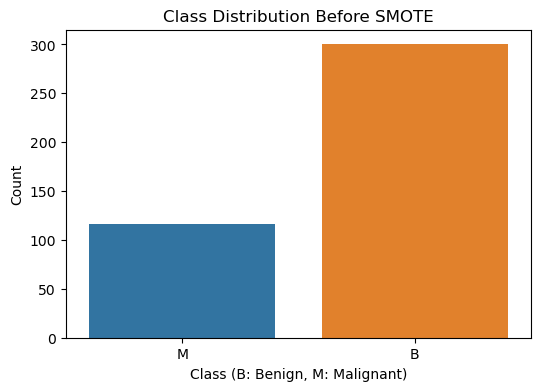

In [45]:

plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class (B: Benign, M: Malignant)")
plt.ylabel("Count")
plt.show()

# Applying SMOTE

In [46]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize class distribution after SMOTE

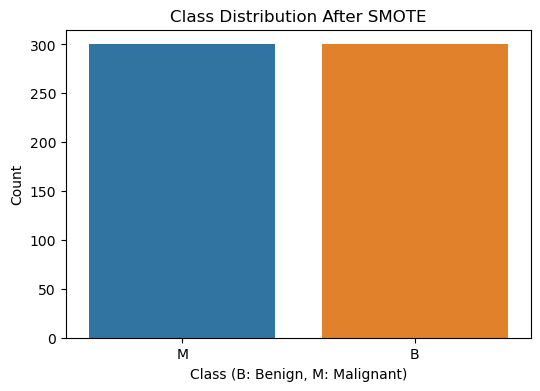

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (B: Benign, M: Malignant)")
plt.ylabel("Count")
plt.show()

## Splitting Data

#### Split the Data:train_test_split divides the scaled feature data (X_scaled) and the target data (y) into training (70%) and testing (30%) sets.

#### Random State:random_state=42 ensures the split is the same each time the code runs.

#### Print Shapes:The shapes of the training and testing sets are printed to show how many samples and features each contains.

In [48]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define Weak Learner for AdaBoost
#### Import Libraries: Import AdaBoostClassifier and DecisionTreeClassifier.

#### Set Weak Learner: Use a simple decision tree (depth = 1) as the base model for AdaBoost.

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Implementing AdaBoost

In [50]:
ada_boost = AdaBoostClassifier(estimator=base_classifier, random_state=42)


# Model Prediction and Evaluation
#### Make Predictions : y_pred_untuned = ada_boost.predict(X_test) predicts labels for the test set.

#### Calculate Metrics : Calculate accuracy, precision, recall, F1 score, and confusion matrix.

#### Display Results : Print the evaluation metrics (accuracy, precision, recall, F1 score).

In [51]:

y_pred_untuned = ada_boost.fit(X_train, y_train).predict(X_test)

# Calculate performance metrics for untuned model
accuracy_untuned = accuracy_score(y_test, y_pred_untuned)
precision_untuned = precision_score(y_test, y_pred_untuned, pos_label='M')
recall_untuned = recall_score(y_test, y_pred_untuned, pos_label='M')
f1_untuned = f1_score(y_test, y_pred_untuned, pos_label='M')
conf_matrix_untuned = confusion_matrix(y_test, y_pred_untuned)

print("\nUntuned Model Performance Metrics:")
print(f"Accuracy: {accuracy_untuned:.2f}")
print(f"Precision: {precision_untuned:.2f}")
print(f"Recall: {recall_untuned:.2f}")
print(f"F1 Score: {f1_untuned:.2f}")
print("\nConfusion Matrix for Untuned Model:")
print(conf_matrix_untuned)



Untuned Model Performance Metrics:
Accuracy: 0.98
Precision: 0.97
Recall: 0.99
F1 Score: 0.98

Confusion Matrix for Untuned Model:
[[89  3]
 [ 1 87]]


# Milestone 3

# Grid Search to find the best combination of hyperparameters

#### This code searches for the best settings for an AdaBoost model.

#### Parameters to Test: It tries different values for:
      Number of trees (n_estimators)
      Step size (learning_rate)
      Boosting type (algorithm)
     
#### Grid Search: It uses GridSearchCV to test all combinations of these settings.

#### Best Settings: It finds and prints the best settings for highest accuracy.

In [52]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}


# Re-evaluating the Tuned Model

In [53]:
# Evaluate the best model found from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Calculate performance metrics for tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, pos_label='M')
recall_tuned = recall_score(y_test, y_pred_tuned, pos_label='M')
f1_tuned = f1_score(y_test, y_pred_tuned, pos_label='M')
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("\nTuned Model Performance Metrics:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")
print("\nConfusion Matrix for Tuned Model:")
print(conf_matrix_tuned)




Tuned Model Performance Metrics:
Accuracy: 0.98
Precision: 0.97
Recall: 0.99
F1 Score: 0.98

Confusion Matrix for Tuned Model:
[[89  3]
 [ 1 87]]


## Visualizing the metrics before and after tunning the model

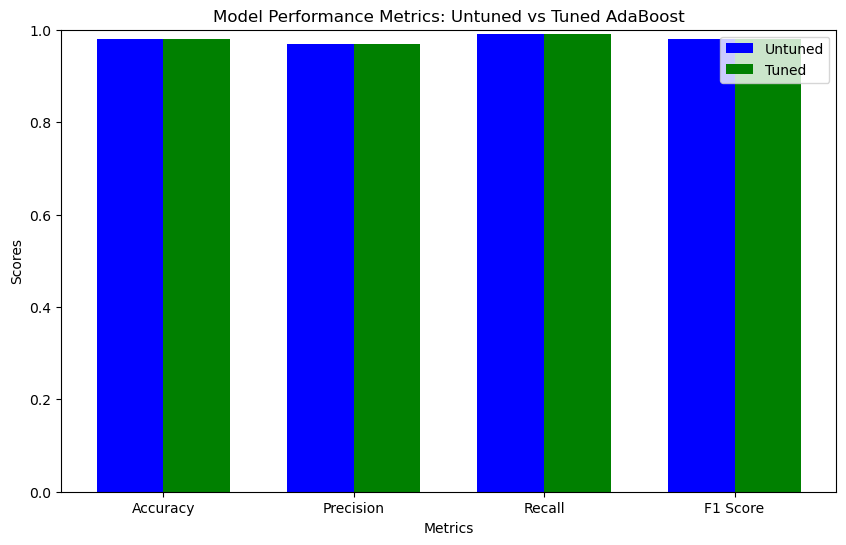

In [54]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
untuned_metrics = [0.98, 0.97, 0.99, 0.98] 
tuned_metrics = [0.98, 0.97, 0.99, 0.98]

x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, untuned_metrics, width, label='Untuned', color='blue')
rects2 = ax.bar(x + width/2, tuned_metrics, width, label='Tuned', color='green')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics: Untuned vs Tuned AdaBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.ylim(0, 1)
plt.show()


# Confusion Matrix

[[89  3]
 [ 1 87]]


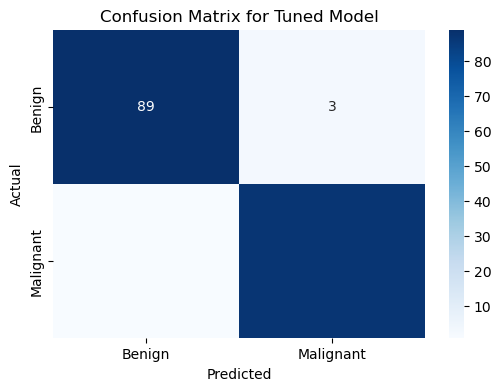

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_tuned_numeric = np.where(y_pred_tuned == 'B', 0, 1)
y_test_numeric = y_test.map({'M': 1, 'B': 0})

# 1. Visualizing the Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


print(conf_matrix_tuned)
plot_confusion_matrix(y_test_numeric, y_pred_tuned_numeric, title="Confusion Matrix for Tuned Model")





# Plotting the ROC Curve

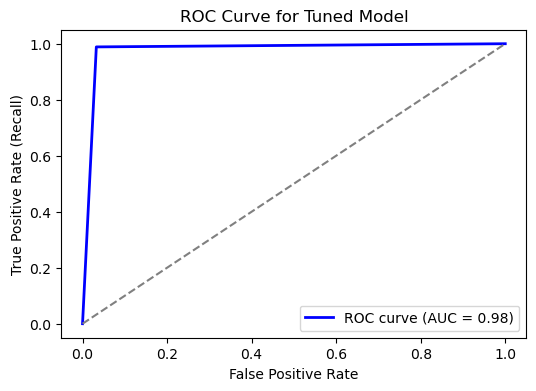

In [57]:

def plot_roc_curve(y_true, y_pred_prob, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.legend(loc='lower right')
    plt.show()

y_pred_prob_tuned = best_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test_numeric, y_pred_prob_tuned, title="ROC Curve for Tuned Model")


# Feature Importance

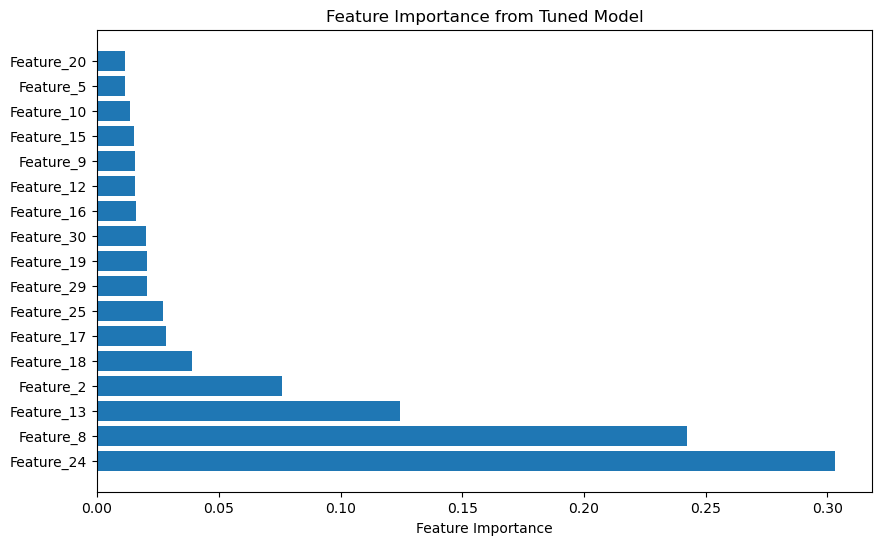

In [58]:
def plot_feature_importance(model, feature_names, title="Feature Importance"):
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), feature_importances[indices], align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.show()

# Plot feature importance using the tuned Random Forest model
plot_feature_importance(best_model, X.columns, title="Feature Importance from Tuned Model")

In [59]:
import pickle
with open('ada_boost.pkl', 'wb') as f:
    pickle.dump(ada_boost, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)